In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from pprint import pprint

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
cpi_data_refined = pd.read_csv('CPI Refined Data.csv', parse_dates={'Date':['DATE']})
cpi_data_refined.set_index('Date', inplace=True)

In [5]:
cpi_data_refined.columns

Index(['CPIH ALL ITEMS', 'FOOD AND NON-ALCOHOLIC BEVERAGES',
       'ALCOHOLIC BEVERAGES AND TOBACCO', 'CLOTHING AND FOOTWEAR',
       'FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE', 'HEALTH', 'TRANSPORT',
       'ELECTRICITY, GAS AND OTHER FUELS', 'COMMUNICATION',
       'RECREATION & CULTURE', 'EDUCATION', 'RESTAURANTS AND HOTELS',
       'MISCELLANEOUS GOODS AND SERVICES'],
      dtype='object')

In [6]:
cpi_data_refined.drop('CLOTHING AND FOOTWEAR',axis=1,inplace=True)

In [7]:
cpi_data_refined.tail()

,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,"FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE",HEALTH,TRANSPORT,"ELECTRICITY, GAS AND OTHER FUELS",COMMUNICATION,RECREATION & CULTURE,EDUCATION,RESTAURANTS AND HOTELS,MISCELLANEOUS GOODS AND SERVICES
Date,,,,,,,,,,,,
2022-08-01,121.772,118.296,126.385,120.606,117.851,137.814,187.615,119.281,118.672,125.437,128.360,111.179
2022-09-01,122.320,119.644,126.845,122.399,118.740,135.522,188.555,119.372,119.237,126.497,129.133,111.696
2022-10-01,124.311,122.025,126.863,123.133,119.222,135.561,234.406,120.249,119.661,129.400,130.385,112.288
2022-11-01,124.787,123.391,127.669,123.840,119.917,135.747,233.879,119.250,120.402,129.400,130.858,112.623
2022-12-01,125.284,125.409,126.250,125.323,120.611,136.464,233.263,118.031,120.145,129.400,132.069,112.963


In [8]:
cpi_data_pre_covid = cpi_data_refined[:384]
cpi_data_pre_covid.tail()

,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,"FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE",HEALTH,TRANSPORT,"ELECTRICITY, GAS AND OTHER FUELS",COMMUNICATION,RECREATION & CULTURE,EDUCATION,RESTAURANTS AND HOTELS,MISCELLANEOUS GOODS AND SERVICES
Date,,,,,,,,,,,,
2019-08-01,108.301,103.757,114.620,104.982,110.485,114.377,115.456,110.211,107.334,114.362,111.940,104.097
2019-09-01,108.414,103.519,114.467,106.156,110.925,111.514,115.472,110.976,107.865,115.575,112.793,104.377
2019-10-01,108.285,102.895,114.870,104.961,110.564,111.275,110.449,111.038,108.294,117.506,112.516,104.377
2019-11-01,108.516,103.752,114.650,105.471,110.862,110.998,110.417,111.011,108.788,117.506,112.335,104.696
2019-12-01,108.520,104.343,113.013,106.907,110.928,111.683,110.442,111.955,108.491,117.506,111.764,104.617


In [9]:
# find len of test data 
cpi_test_data = cpi_data_pre_covid.loc['2019-01-01':'2019-12-01']
print(len(cpi_test_data))
print(len(cpi_data_pre_covid))

12
384


In [10]:
X = cpi_data_pre_covid.drop('CPIH ALL ITEMS', axis=1)
y = cpi_data_pre_covid['CPIH ALL ITEMS']

In [11]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.97, random_state=42, shuffle=False)
X_train.shape, X_test.shape

((372, 11), (12, 11))

In [12]:
X_test.tail()

,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,"FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE",HEALTH,TRANSPORT,"ELECTRICITY, GAS AND OTHER FUELS",COMMUNICATION,RECREATION & CULTURE,EDUCATION,RESTAURANTS AND HOTELS,MISCELLANEOUS GOODS AND SERVICES
Date,,,,,,,,,,,
2019-08-01,103.757,114.620,104.982,110.485,114.377,115.456,110.211,107.334,114.362,111.940,104.097
2019-09-01,103.519,114.467,106.156,110.925,111.514,115.472,110.976,107.865,115.575,112.793,104.377
2019-10-01,102.895,114.870,104.961,110.564,111.275,110.449,111.038,108.294,117.506,112.516,104.377
2019-11-01,103.752,114.650,105.471,110.862,110.998,110.417,111.011,108.788,117.506,112.335,104.696
2019-12-01,104.343,113.013,106.907,110.928,111.683,110.442,111.955,108.491,117.506,111.764,104.617


In [13]:
X_train.shape[0]

372

In [14]:

rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [16]:
# randomized search hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [18]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\baile\.conda\envs\InflationProject\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [20]:
# X_test.tail()

In [21]:
# rmse, mae, mse
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,predictions)
    r2 = r2_score(y_test, predictions)
    
    print('Model Performance')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('R2:', r2)

#     errors = abs(predictions - y_test)
#     mape = 100 * np.mean(errors / y_test)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return predictions

In [22]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

base_predictions = base_accuracy

#create df of base predictions (pred using standard model)
base_predicted_df = pd.DataFrame(base_predictions, index=pd.date_range('2018-12-01',periods=12,freq='M'))


Model Performance
MSE:  1.3690440924999738
RMSE:  1.1700615763710789
MAE:  1.0513416666666586
R2: -1.9354613052842917


In [23]:
# # visualise tree
# from sklearn.tree import export_graphviz

# standard_model_estimator = base_model.estimators_[5]
# export_graphviz(standard_model_estimator, out_file='tree.dot', 
#                 feature_names = X_train.columns.values.tolist(),
#                 class_names = ['CPIH ALL ITEMS'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [24]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test, y_test)

best_estimate_predictions = random_accuracy

#create df of best esti. predictions (pred using random search model)
best_estimate_predicted_df = pd.DataFrame(best_estimate_predictions, index=pd.date_range('2018-12-01',periods=12,freq='M'))


Model Performance
MSE:  1.121824909430166
RMSE:  1.0591623621665216
MAE:  0.9262518333320694
R2: -1.405381704633717


In [25]:
from sklearn.metrics import r2_score

# performance on training data
rf_tuned_y_train_predict = best_random.predict(X_train)

mse_train_tuned = mean_squared_error(y_train,rf_tuned_y_train_predict)

r2_train_tuned = r2_score(y_train, rf_tuned_y_train_predict)

print('Train MSE: ', mse_train_tuned)
print('Train R2: ', r2_train_tuned)

Train MSE:  1.2107564748256977e-24
Train R2:  1.0


In [26]:
rf_base_y_train_predict = base_model.predict(X_train)

mse_train_base = mean_squared_error(y_train, rf_base_y_train_predict)

r2_train_base = r2_score(y_train, rf_base_y_train_predict)

print('Train MSE: ', mse_train_base)
print('Train R2: ', r2_train_base)

Train MSE:  0.011247901129032201
Train R2:  0.9999552523248721


In [27]:
# base_model.score(X_train, y_train)#

In [28]:
# from sklearn.model_selection import cross_validate

In [29]:
# rf_random_scores = cross_validate(rf_random, X_train, y_train, cv=3)
# print('Mean R^2 score:', np.mean(rf_random_scores))
# print('Standard deviation of R^2 score:', np.std(rf_random_scores))

In [30]:
# print('hyper-tuned rf R2 score: ', rf_random_scores['test_r2'])

In [31]:
# base_scores = cross_val_score(base_model, X_train, y_train, cv=3)
# print('Mean R^2 score:', np.mean(base_scores))
# print('Standard deviation of R^2 score:', np.std(base_scores))

In [32]:
# print('base rf R2 score: ', base_scores['test_r2'])

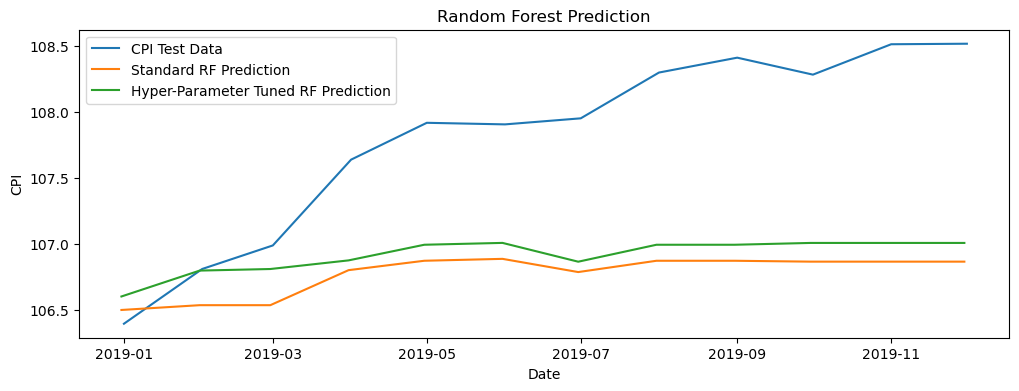

In [34]:
## graph plot
plt.figure(figsize=(12,4))
plt.plot(cpi_data_pre_covid.loc['2019-01-01':'2019-12-01']['CPIH ALL ITEMS'], label="CPI Test Data")
# plt.plot(cpi_data_pre_covid.loc['2015-01-01':'2019-01-01']['CPIH ALL ITEMS'], label='CPI Training Data')
plt.plot(base_predicted_df, label="Standard RF Prediction")
plt.plot(best_estimate_predicted_df, label="Hyper-Parameter Tuned RF Prediction")
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(loc='best')
plt.title('Random Forest Prediction')
plt.show()
